# AI FR News

In [1]:
import pandas as pd
DS = pd.read_csv("C:/Users/Jhonnatan/Documents/GitHub/Impact-of-AI-in-organizations/Datasets/news_articles.csv")
DS.head()

,Title,Link,Description,Publication Date
0,NaN,https://world.businessfrance.fr/nordic/wp-cont...,NaN,NaN
1,NaN,https://acpr.banque-france.fr/sites/default/fi...,NaN,NaN
2,AI in Business and Finance - OCDE,https://search.oecd.org/fr/investissement/ai-i...,"Données et analyses sur l'investissement, les ...",NaN
3,NaN,https://www.imf.org/-/media/Files/Publications...,NaN,NaN
4,Master of Science Artificial Intelligence & Da...,https://www.aivancity.ai/en/student/program/gr...,"All informations about the ""Grande Ecole"" prog...",NaN


C:\Users\Jhonnatan\AppData\Local\Temp\ipykernel_14064\2966248418.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Publication Date'] = pd.to_datetime(df['Publication Date'], errors='coerce')
C:\Users\Jhonnatan\AppData\Local\Temp\ipykernel_14064\2966248418.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Combined Text'] = df['Title'].fillna('') + ' ' + df['Description'].fillna('')
C:\Users\Jhonnatan\AppData\Local\Temp\ipykernel_14064\2966248418.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

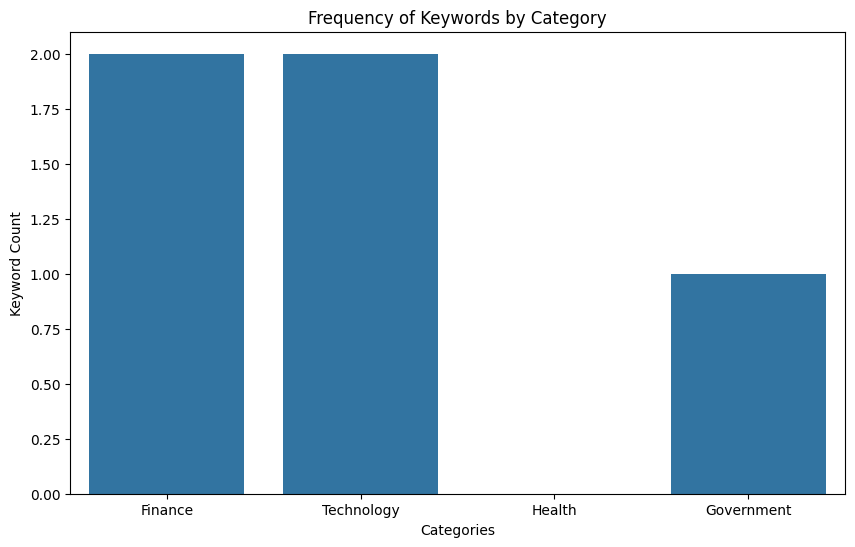

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np
df = DS

# Preprocess and clean the data
# Convert 'Publication Date' to datetime format and handle missing values
df['Publication Date'] = pd.to_datetime(df['Publication Date'], errors='coerce')

# Drop rows with missing or invalid 'Publication Date'
df = df.dropna(subset=['Publication Date'])

# Hypothesis 1: Trend Over Time
# Group by year and count the number of articles per year
df_yearly = df['Publication Date'].dt.year.value_counts().sort_index()

# Hypothesis 2: Content Analysis
# Combine title and description into a single text column, then count the occurrence of key AI-related words
df['Combined Text'] = df['Title'].fillna('') + ' ' + df['Description'].fillna('')
keywords = ['AI', 'artificial intelligence', 'machine learning', 'automation', 'robotics']
keyword_counts = {keyword: df['Combined Text'].str.contains(keyword, case=False, na=False).sum() for keyword in keywords}

# Hypothesis 3: Publication Date Analysis
# Extract the month from the 'Publication Date' and count the number of articles per month
df['Month'] = df['Publication Date'].dt.month
monthly_counts = df['Month'].value_counts().sort_index()

# Enhancing the categories with additional keywords
categories_enhanced = {
    'Finance': ['finance', 'économie', 'budget', 'fiscal', 'investment', 'market', 'economy', 'trading'],
    'Technology': ['numérique', 'technologie', 'innovation', 'digital', 'AI', 'data', 'software', 'internet'],
    'Health': ['santé', 'médical', 'soins', 'health', 'medicine', 'wellness', 'care', 'pharmacy'],
    'Government': ['gouvernement', 'politique', 'législation', 'régulation', 'law', 'policy', 'regulation', 'administration']
}

# Count the occurrence of keywords in each category
category_counts = {category: sum(df['Combined Text'].str.contains(keyword, case=False, na=False).sum() for keyword in keywords)
                   for category, keywords in categories_enhanced.items()}

# Plotting the graph for category-wise keyword frequency
plt.figure(figsize=(10, 6))
sns.barplot(x=list(category_counts.keys()), y=list(category_counts.values()))
plt.title('Frequency of Keywords by Category')
plt.xlabel('Categories')
plt.ylabel('Keyword Count')
plt.show()

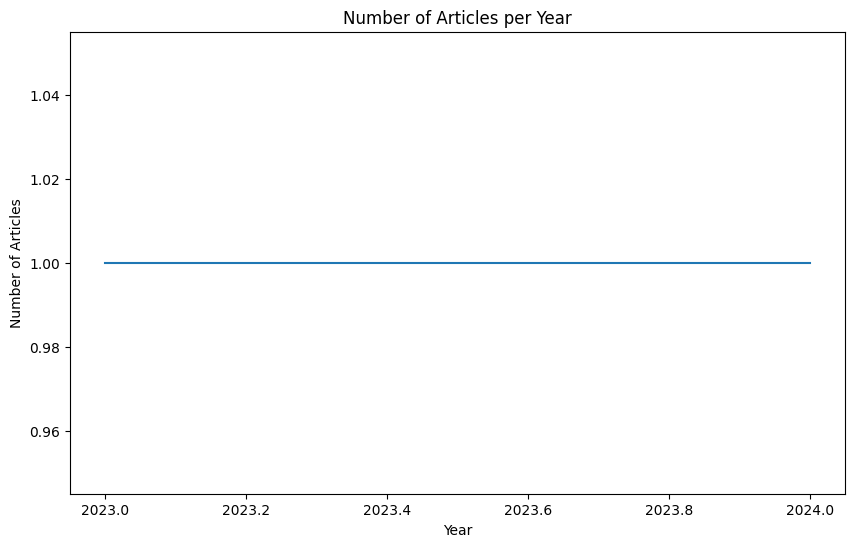

In [3]:
# Reload the dataset in case it has been modified
df = DS

# Convert 'Publication Date' to datetime format and handle missing values
df['Publication Date'] = pd.to_datetime(df['Publication Date'], errors='coerce')

# Drop rows with missing or invalid 'Publication Date'
df = df.dropna(subset=['Publication Date'])

# Hypothesis 1: Trend Over Time
# Group by year and count the number of articles per year
df_yearly = df['Publication Date'].dt.year.value_counts().sort_index()

# Plotting the graph for Trend Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_yearly.index, y=df_yearly.values)
plt.title('Number of Articles per Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.show()


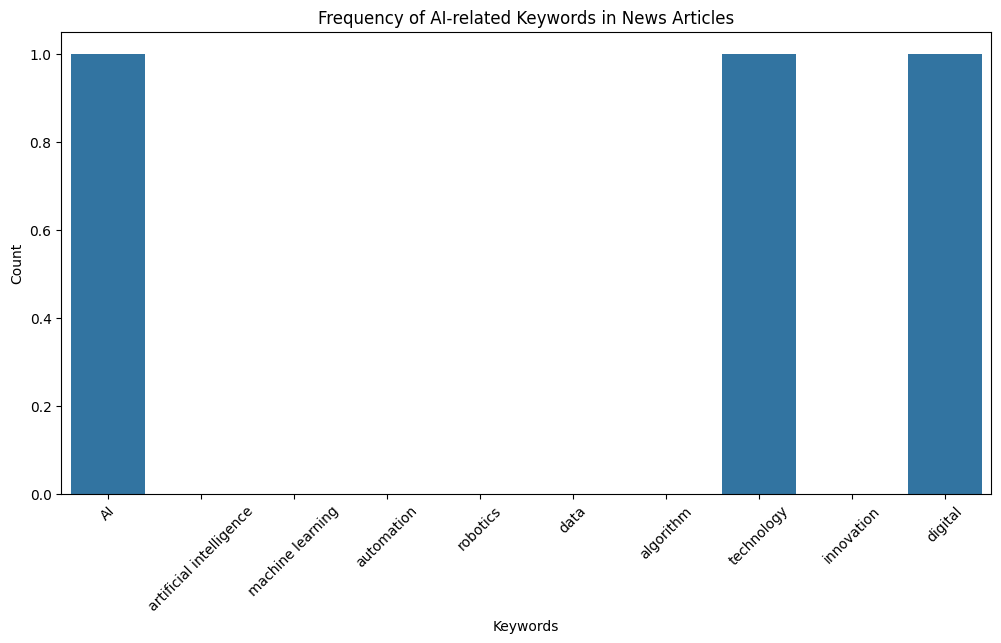

In [17]:
# Hypothesis 2: Content Analysis
# Combine title and description into a single text column, then count the occurrence of key AI-related words
df['Combined Text'] = df['Title'].fillna('') + ' ' + df['Description'].fillna('')
ai_related_keywords = ['AI', 'artificial intelligence', 'machine learning', 'automation', 'robotics', 'data', 'algorithm', 'technology', 'innovation', 'digital']
keyword_counts = {keyword: df['Combined Text'].str.contains(keyword, case=False, na=False).sum() for keyword in ai_related_keywords}

# Plotting the graph for Content Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x=list(keyword_counts.keys()), y=list(keyword_counts.values()))
plt.title('Frequency of AI-related Keywords in News Articles')
plt.xlabel('Keywords')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()
